In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from gmm_dataset import *
from util import *
from torch.distributions.normal import Normal
from torch.distributions.uniform import Uniform
import math

In [6]:
T = 30
K = 3
D = 2
num_seqs = 100
Ys = np.zeros((num_seqs, T, D))
Zs_true = np.zeros((num_seqs, T, K))
Mus = np.zeros((num_seqs, K, D))
for n in range(num_seqs):
    Y, mus_true, covs_true, Z, Pi = sampling_gmm(T, K, D)
    Ys[n] = Y.data.numpy()
    Zs_true[n] = Z.data.numpy()
    Mus[n] = mus_true.data.numpy()
    if n % 100 == 0:
        print(n)

0


In [7]:
np.save('gmm_dataset/sequences', Ys)
np.save('gmm_dataset/states', Zs_true)
np.save('gmm_dataset/means', Mus)
np.save('gmm_dataset/covariances', covs_true.data.numpy())
np.save('gmm_dataset/init', Pi.data.numpy())

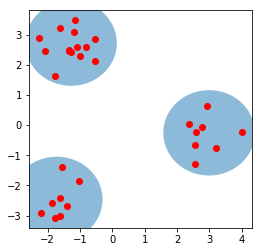

In [8]:
plot_samples(Y, mus_true, torch.eye(2).unsqueeze(0).repeat(K, 1, 1) * 0.5)

In [ ]:
prior = initial_trans_prior(K)
Dirichlet(prior).sample()

In [ ]:

radius = 2.0
C = np.zeros((3, 2))

angle1 = Uniform(0.0, 2 * math.pi).sample().item()
C[0, 0] = math.cos(angle1) * radius
C[0, 1] = math.sin(angle1) * radius
angle2 = angle1 + 2 * math.pi / 3
if angle2 > 2 * math.pi:
    angle2 -= 2 * math.pi
C[1, 0] = math.cos(angle2) * radius
C[1, 1] = math.sin(angle2) * radius
angle3 = angle2 + 2 * math.pi / 3
if angle3 > 2 * math.pi:
    angle3 -= 2 * math.pi
C[2, 0] = math.cos(angle3) * radius
C[2, 1] = math.sin(angle3) * radius

In [ ]:
plt.scatter(C[:, 0], C[:, 1])